In [1]:
import importlib
import calibration_metric
from calibration_metric.vis.calibration_plot import plot_df, get_df_from_file
from calibration_metric.utils.reader import MisoTopLogitFormatSequenceReader
importlib.reload(calibration_metric)

calflow_paths_and_models = [("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-small-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-base-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-large-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits", 
                             "T5-large"),
                            ("/brtx/604-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/bart-base_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/bart-large_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-large")]

tree_dst_paths_and_models = [("/brtx/605-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-small-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-base-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-large-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-large"),
                            ("/brtx/604-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/bart-base_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/605-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/bart-large_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-large")]

all_dfs = {"calflow": {}, "tree_dst": {}}

print("get calflow dfs")
for path, name in calflow_paths_and_models:
    all_dfs['calflow'][name] = get_df_from_file(path)
print("get tree_dst dfs")
for path, name in tree_dst_paths_and_models:
    all_dfs['tree_dst'][name] = get_df_from_file(path)


# df_to_plot = get_df_from_file(path_to_file, n_bins=20)
# fig = plot_df(df_to_plot)

get calflow dfs
Number of examples: 1081348
correct_sum: 1068488
[0.0625     0.19672131 0.21323529 0.28251121 0.278125   0.36574074
 0.38330171 0.43617021 0.47381865 0.53447325 0.56684492 0.59438529
 0.63186319 0.66021335 0.75       0.76794465 0.82356771 0.86857722
 0.91220742 0.99775228]
[0.07264114 0.11900908 0.16537703 0.21174497 0.25811291 0.30448086
 0.3508488  0.39721674 0.44358469 0.48995263 0.53632057 0.58268851
 0.62905646 0.6754244  0.72179234 0.76816029 0.81452823 0.86089617
 0.90726411 0.95363206 1.        ]
Number of examples: 1081348
correct_sum: 1075775
[0.         0.5        0.23076923 0.28571429 0.36956522 0.20481928
 0.44444444 0.36979167 0.44897959 0.51826793 0.56521739 0.59240506
 0.63811821 0.64519535 0.70893372 0.74322169 0.79174256 0.82210353
 0.88671473 0.99859286]
[0.09996216 0.14496405 0.18996594 0.23496784 0.27996973 0.32497162
 0.36997351 0.4149754  0.4599773  0.50497919 0.54998108 0.59498297
 0.63998486 0.68498676 0.72998865 0.77499054 0.81999243 0.86499432

In [2]:

miso_cf_df = get_df_from_file("/brtx/604-nvme1/estengel/calflow_calibration/miso/tune_roberta_tok_fix_benchclamp_data/translate_output/test_all.logits",
                     n_bins=20,
                     reader_cls=MisoTopLogitFormatSequenceReader)

miso_td_df = get_df_from_file("/brtx/603-nvme1//estengel/calflow_calibration/tree_dst/tune_roberta//translate_output/test_all.logits",
                     n_bins=20,
                     reader_cls=MisoTopLogitFormatSequenceReader)

all_dfs['calflow']['MISO'] = miso_cf_df
all_dfs['tree_dst']['MISO'] = miso_td_df

Number of examples: 194302
correct_sum: 190533
[0.         0.16666667 0.15384615 0.19047619 0.25       0.47457627
 0.375      0.35454545 0.53409091 0.45588235 0.50967742 0.57647059
 0.55932203 0.5883905  0.68432671 0.63043478 0.71266003 0.75600384
 0.82177709 0.99213957]
[0.13734148 0.18047435 0.22360722 0.26674008 0.30987295 0.35300582
 0.39613868 0.43927155 0.48240441 0.52553728 0.56867015 0.61180301
 0.65493588 0.69806874 0.74120161 0.78433448 0.82746734 0.87060021
 0.91373308 0.95686594 0.99999881]
Number of examples: 527046
correct_sum: 523586
[0.04444444 0.10646388 0.08029197 0.16       0.19230769 0.1884058
 0.28057554 0.25625    0.34502924 0.40677966 0.46819338 0.54383117
 0.6509434  0.64014467 0.68676471 0.70275229 0.76856649 0.81513648
 0.86069049 0.99879632]
[0.02381089 0.07262033 0.12142977 0.17023921 0.21904864 0.26785808
 0.31666752 0.36547696 0.41428639 0.46309583 0.51190527 0.56071471
 0.60952414 0.65833358 0.70714302 0.75595246 0.80476189 0.85357133
 0.90238077 0.951190

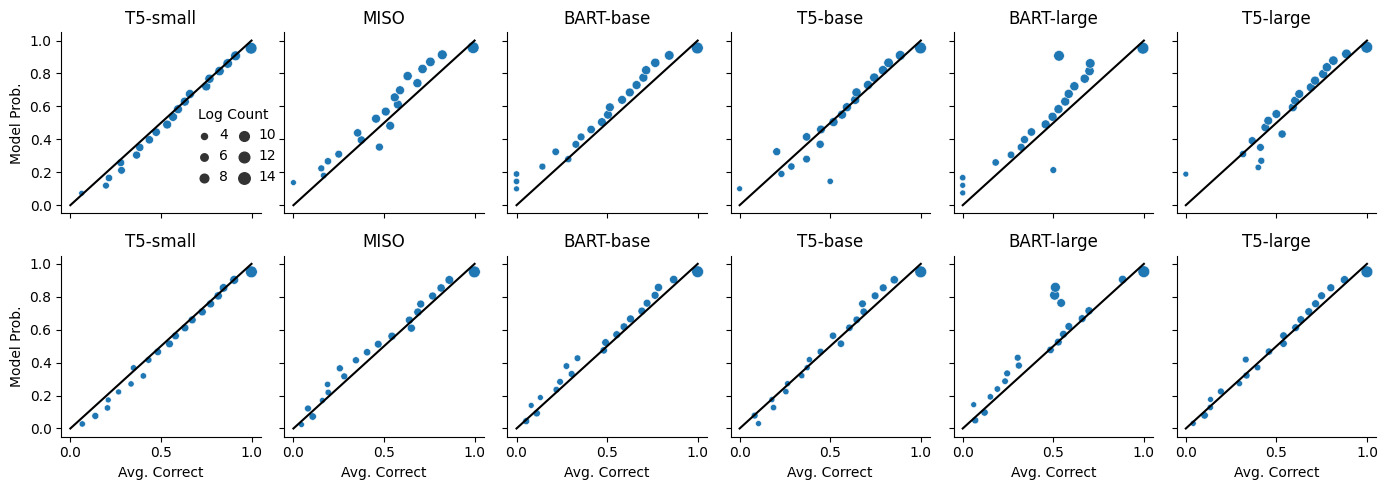

In [3]:
from matplotlib import pyplot as plt 
importlib.reload(calibration_metric)

fig, axes = plt.subplots(2, 6, figsize=(14, 5), sharex=True, sharey=True)


order = ["T5-small", "MISO", "BART-base", "T5-base", "BART-large", "T5-large" ]


for i, model in enumerate(order):
    try:
        cf_df_to_plot = all_dfs['calflow'][model]
        plot_df(cf_df_to_plot, ax=axes[0, i], title=model, show_legend=False)
    except:
        pass
    try:
        td_df_to_plot = all_dfs['tree_dst'][model]
        plot_df(td_df_to_plot, ax=axes[1, i], title=model, show_legend=False)
    except KeyError:
        pass

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, title="Log Count", frameon=False, bbox_to_anchor=(0.21, 0.8), handletextpad=0.1, columnspacing=0.1)
fig.tight_layout()

plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/all_models_calibration_plot.pdf")